# Série 9
Ce document contient les différents exercices à réaliser. Veuillez compléter et rendre ces exercices dans deux semaines.

Pour chaque exercice:

* implémentez ce qui est demandé
* commentez votre code
* expliquez **en français** ce que vous avez codé dans la cellule correspondante

Dans vos explications à chacun des exercices, indiquez un pourcentage subjectif d'investissement de chaque membre du groupe. Des interrogations aléatoires en classe pourront être réalisées pour vérifier votre contribution/compréhension.

Les tentatives infructueuses, les explications, commentaires et analyses des échecs rapportent des points. Ne rendez pas copie-blanche, même si votre fonction n'est pas correcte.

## Description
Un arbre binaire peut être utilisé pour stocker une liste ordonnée d'éléments de manière à ce que la recherche et les insertions soient efficaces. Un arbre binaire utilisé de cette manière s'appelle un **arbre de tri binaire** (ou BST).

Un arbre de tri binaire est un arbre binaire ayant la propriété suivante : pour chaque nœud de l'arbre, l'élément de ce nœud est supérieur à chaque élément du sous-arbre gauche de ce nœud, et il est inférieur ou égal à tous les éléments du sous-arbre droit de ce nœud. L'exemple ci-dessous montre un arbre de tri binaire contenant des éléments de type `String`, mais il en va de même pour les entiers, ou d'autres types comparables.


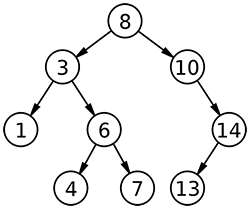

## Evaluation
Le but de l'évaluation est de montrer expérimentalement, au moyen d'une implémentation et de quelques évaluations simples, l'affirmation $H_0$ suivante :
>Si un **arbre de tri binaire** est créé **aléatoirement suivant une loi uniforme**, il y a une forte probabilité que l'arbre soit **approximativement équilibré** (*i.e.*, l'écart type de la distribution de la profondeur des feuilles est faible).

### Exercice 1
Testez la structure de données fournie en implémentant la méthode `to_sorted_list` qui retourne une liste avec les éléments ordonnés contenu dans l'arbre, du plus petit au plus grand.

In [ ]:
# Un objet de type TreeNode représente un nœud.
class TreeNode():
    def __init__ (self, item):
        self.item = item
        self.left = None    # Objet TreeNode qui pointe vers le sous-arbre gauche.
        self.right = None   # Objet TreeNode qui pointe vers le sous-arbre droit.

class Tree:
    def __init__(self):
        self.root = None

    # Ajouter l'élément à l'arbre de tri binaire auquel la variable globale "root" fait référence.
    # (Notez que root ne peut pas être passée comme paramètre à cette routine car la valeur de root pourrait changer, et un changement de la valeur d'un paramètre formel ne change pas le paramètre réel).
    # new_item: String
    def insert(self, new_item):
        # L'arbre est vide.  Définissez la racine pour qu'elle pointe vers un nouveau nœud contenant le nouvel élément.
        if self.root == None:
            self.root = TreeNode(new_item)
            return
        # Descend dans l'arbre pour trouver une place pour new_item.
        # Nous commençons par la racine
        runner = self.root
        while(True):
            # Puisque le nouvel élément est inférieur à l'élément runner, il appartient au sous-arbre gauche du coureur.
            # S'il y a un espace libre à runner.left, ajoutez-y un nœud. Sinon, avancez runner d'un niveau vers la gauche.
            if new_item < runner.item:
                if runner.left == None:
                    runner.left = TreeNode(new_item)
                    # Un nouvel élément a été ajouté à l'arbre
                    return
                else:
                    runner = runner.left
            # Puisque le nouvel élément est supérieur ou égal à l'élément runner, il appartient au sous-arbre droit de runner.
            # S'il y a un espace libre à runner.right, ajoutez-y un nouveau nœud. Sinon, avancez runner d'un niveau vers la droite.
            else:
                if runner.right == None:
                    runner.right = TreeNode(new_item)
                    # Un nouvel élément a été ajouté à l'arbre.
                    return
                else:
                    runner = runner.right

    # Retourne True si item est un des items de l'arbre de tri binaire vers lequel le nœud pointe.
    # Retourne False si ce n'est pas le cas.
    def contains(self, item):
        # Retourne True si item est un des items de l'arbre de tri binaire vers lequel le nœud pointe.
        # Retourne False si ce n'est pas le cas
        def contains_internal(node, item):
            # L'arbre est vide, il ne contient donc certainement pas d'élément.
            if node == None:
                return False
            # Oui, l'élément a été trouvé dans le nœud racine.
            elif item == node.item:
                return True
            # Si l'élément apparaît, il doit se trouver dans le sous-arbre de gauche
            # On renvoie le résultat de la recherche dans le sous-arbre de gauche
            elif item < node.item:
                return contains_internal(node.left, item)
            # Si l'élément apparaît, il doit se trouver dans le sous-arbre de droite
            # On renvoie le résultat de la recherche dans le sous-arbre de droite
            else:
                return contains_internal(node.right, item)

        return contains_internal(self.root, item)

    # Crée une liste ordonnée croissante des élément du BST
    def to_sorted_list(self):
        result = []
        def to_sorted_list_internal(node):
            if node is None:
                return []
            else:
                to_sorted_list_internal(node.left)
                result.append(node.item)
                to_sorted_list_internal(node.right)
        to_sorted_list_internal(self.root) #on appelle la fonction interne sur la racine de l'arbre, pour qu'il le visite entièrement et remplisse result.
        return result


In [ ]:
t = Tree()
# les lettres de l'alphabet latin sont comparables en Python
t.insert("d")
t.insert("b")
t.insert("f")
t.insert("c")
t.insert("a")
t.insert("e")
t.insert("g")
sorted_list = t.to_sorted_list()
assert ["a", "b", "c", "d", "e", "f", "g"] == sorted_list
assert t.contains("a")
assert not t.contains("z")

In [ ]:
"On fait des tests pour voir si tout fonctionne bien"
# on teste avec des nombres entiers positifs
t = Tree()
l = [7,2,4,9,1,5]
for i in l:
    t.insert(i)
print(t.to_sorted_list())
assert t.contains(4)
assert not t.contains(100)

# on teste avec des nombres entiers ou non, positif ou non
t = Tree()
l = [100,50,3,67,88,46,18,-4, -15, 2.9, 0.8, 0]
for i in l:
    t.insert(i)
print(t.to_sorted_list())
assert t.contains(18)
assert t.contains(-15)
assert not t.contains(-1)

[1, 2, 4, 5, 7, 9]
[-15, -4, 0, 0.8, 2.9, 3, 18, 46, 50, 67, 88, 100]


COMMENTAIRE:
On voit que le test avec des lettres dans les feuilles fonctionne bien (car il ne soulève aucune erreur). Nous avons créé 2 autres tests, qui renvoie des listes triées, comme prévu. Cependant, on peut noter qu'il est nécessaire que l'arbre contienne des éléments comparables, sinon la fonction to_sorted_list ne peut pas les comparer entre-eux.

### Exercice 2
Créez un arbre de tri binaire aléatoire suivant $U[\![0;1000]\!]$ avec $2^{15}$ (32'768) nœuds. Vous pouvez remplir l'arbre en utilisant la méthode `insert` (voir le code source). Affichez les nombres du plus petits aux plus grands.

In [ ]:
import random

random_tree = Tree()
for i in range (2**15):
    x = random.randint(0,1000) #on choisit un nombre aléatoire entre 0 et 1000
    random_tree.insert(x) #on l'insère dans l'arbre

l = random_tree.to_sorted_list #on met les nombres en ordre croissant à l'aide de la fonction créée précédemment 
print (l)

<bound method Tree.to_sorted_list of <__main__.Tree object at 0x104947710>>


### Exercice 3
Calculez et affichez la profondeur moyenne de toutes les feuilles de l'arbre créé dans l'exercice 2.

Pour vous aider vous pourriez créer un petit fichier texte appelé `depths.txt`, avec la profondeur de chaque feuille, une valeur par ligne. Mais vous pouvez utiliser une variable pour stocker l'information. Une liste ferait l'affaire.

Pour ce faire, vous aurez besoin de deux fonctions récursives : une pour compter les feuilles et une pour trouver la somme des profondeurs de toutes les feuilles. Cette dernière routine doivent accepter un paramètre de type entier (depth), qui indique à quelle profondeur de l'arbre vous êtes allés. Lorsque vous appelez cette routine de manière récursive, la valeur de la profondeur augmente de 1. Vous êtes libre de définir des paramètres additionels, mais la récusivité est exigée pour cet exercice.

In [ ]:
def count_leaves(root):

    # cas 1: arbre vide
    if root is None: 
        return 0
    #cas 2: arbre a 1 feuille
    if root.left is None and root.right is None:
        return 1
    #cas 3: arbre a au moins 2 feuilles
    else: 
        return (count_leaves(root.left)+count_leaves(root.right))

def sum_depth(root, depth):
    # cas 1: arbre vide
    if root is None: 
        return 0
    #cas 2: arbre a 1 feuille
    if root.left is None and root.right is None:
        return depth
    #cas 3: arbre a au moins 2 feuilles
    else: 
        return (sum_depth(root.left, depth+1) +  sum_depth(root.right, depth+1))
    

In [ ]:
print("Number of leaves:")
counter = count_leaves(random_tree.root)
print(counter)
print("Sum of depth of all leaves")
# Utiliser f.write(...) dans la fonction sum_depth() pour écrire dans depths.txt
with open("depths.txt", 'a+') as file:
    s = sum_depth(random_tree.root, 1)
print(s)
print("Average depth:")
print(s/counter)

Number of leaves:
1001
Sum of depth of all leaves
45916
Average depth:
45.87012987012987


#### Exercice 3.1 (<font color='#db60cf'>Bonus</font>)
Reportez dans un graphique la distribution des profondeurs des feuilles (il y a `counter` feuilles à afficher sur un histogramme). Vous pourrez vous aider en utilisant [Matplotlib](https://matplotlib.org/), un outil de visualisation pour Python. Matplotlib est déjà inclu dans la plupart des plateforms en ligne de Jupyter Notebook (notamment Colab).

Profondeurs des feuilles : [10, 10, 12, 10, 10, 7, 17, 18, 16, 15, 14, 11, 11, 12, 13, 12, 15, 18, 18, 20, 18, 19, 16, 18, 19, 19, 20, 18, 18, 15, 14, 17, 15, 15, 18, 17, 18, 18, 17, 20, 21, 21, 14, 15, 15, 15, 12, 11, 13, 13, 12, 12, 11, 12, 12, 15, 14, 13, 13, 14, 16, 17, 19, 18, 13, 12, 13, 14, 17, 14, 12, 12, 18, 18, 17, 15, 16, 14, 13, 16, 13, 12, 14, 12, 12, 14, 14, 15, 16, 15, 16, 15, 15, 15, 15, 19, 19, 19, 19, 18, 18, 16, 17, 16, 16, 16, 15, 16, 14, 17, 15, 12, 14, 14, 17, 20, 19, 22, 21, 20, 17, 18, 15, 15, 14, 17, 16, 18, 21, 21, 22, 20, 19, 18, 19, 16, 15, 16, 17, 15, 14, 18, 19, 18, 13, 16, 14, 16, 16, 15, 13, 14, 18, 18, 17, 17, 15, 17, 15, 15, 17, 16, 16, 16, 16, 16, 15, 18, 18, 19, 17, 15, 13, 16, 12, 16, 18, 18, 18, 16, 17, 13, 13, 17, 16, 16, 15, 17, 18, 15, 18, 18, 17, 19, 15, 16, 14, 13, 18, 17, 19, 19, 12, 13, 17, 16, 15, 15, 16, 17, 15, 16, 14, 15, 14, 17, 19, 18, 16, 16, 17, 18, 20, 20, 20, 22, 19, 15, 13, 14, 13, 12, 14, 16, 17, 14, 12, 11, 11, 14, 13, 15, 14, 1

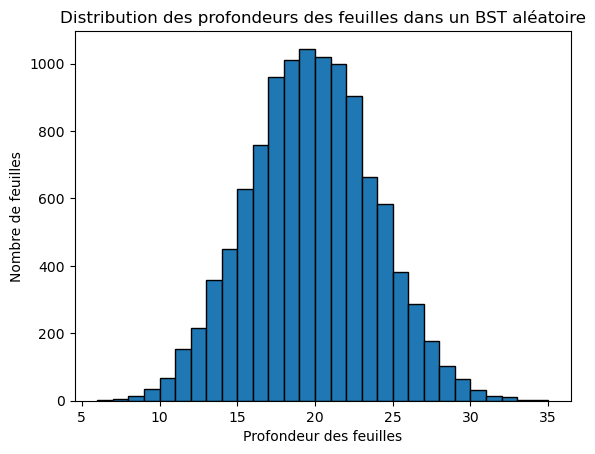

In [ ]:
import matplotlib.pyplot as plt
import random

def get_leaf_depths(node, depth=0, depths=None):
    if depths is None:
        depths = []

    if node is None:
        return depths

    if node.left is None and node.right is None:
        depths.append(depth)
        return depths

    if node.left:
        get_leaf_depths(node.left, depth + 1, depths)
    if node.right:
        get_leaf_depths(node.right, depth + 1, depths)

    return depths

t = Tree()
values = list(range(2**15))  
random.shuffle(values)
for x in values:
    t.insert(x)

leaf_depths = get_leaf_depths(t.root)
print("Profondeurs des feuilles :", leaf_depths)

plt.hist(
    leaf_depths,
    bins=range(min(leaf_depths), max(leaf_depths) + 2),
    edgecolor='black'
)

plt.xlabel("Profondeur des feuilles")
plt.ylabel("Nombre de feuilles")
plt.title("Distribution des profondeurs des feuilles dans un BST aléatoire")
plt.show()

Ce résultat semble-t-il dans le sens de l'hypothèse $H_0$ formulée plus tôt ? Quel serait l'intérêt qu'une telle hypothèse fût vraie ? Quelle allure aurait l'histogramme si le BST était parfaitement équilibré ?

Premièrement, afin de faciliter la réflexion, nous allons commencer par répondre à la troisième question : Quelle allure aurait
l’histogramme si le BST était parfaitement équilibré ?
Dans un BST parfaitement équilibré, les feuilles ont toutes pratiquement la même profondeur : elles peuvent différer d'au plus 1, et si l’arbre est complet, elles ont toutes exactement la même profondeur. Ainsi, la profondeur des feuilles ne prend qu’une ou deux valeurs consécutives. L'histogramme serait donc totalement concentré sur un ou deux points, ce qui traduit une distribution extrêmement étroite.


Nous pouvons maintenant nous attaquer à la première question : Ce résultat semble-t-il aller dans le sens de l'hypothèse H0 ?
L’hypothèse H₀ affirme que, si le BST est construit à partir d’un ordre d’insertion aléatoire, les profondeurs des feuilles devraient être relativement proches les unes des autres. L’histogramme obtenu expérimentalement montre justement que la profondeur des feuilles se concentre dans un intervalle resserré. La distribution n'est ni très étalée, ni irrégulière, ce qui indique que l’arbre n’est pas dégénéré. La concentration des profondeurs ressemble à celle observée dans un arbre équilibré. Ainsi, on peut suggérer que le BST généré est approximativement équilibré, ce qui correspond exactement à la prédiction de H0.

Enfin, nous pouvons répondre à la deuxième question : Quel serait l’intérêt qu’une telle hypothèse fût vraie ?
Si l’hypothèse H0 est vraie, cela signifie qu’un BST construit à partir de données arrivant dans un ordre aléatoire a de fortes chances d’être naturellement proche d’un arbre équilibré, sans avoir besoin d’un mécanisme explicite d’équilibrage. En conséquence, les opérations fondamentales d’un BST (recherche, insertion, suppression) ont alors un coût O(log n) en moyenne, cela garantit de bonnes performances si l’ordre des données n’est pas pathologiquement ordonné.


Faites varier la limite supérieure en paramètre de votre générateur uniforme d'entiers parmi `np.arange(50, 500, 10)` en prenant soin de conserver à chaque fois l'écart type et la moyenne de la distribution. Que remarquez-vous ? Comment l'expliqueriez-vous ?

100%|██████████| 45/45 [00:06<00:00,  7.34it/s]


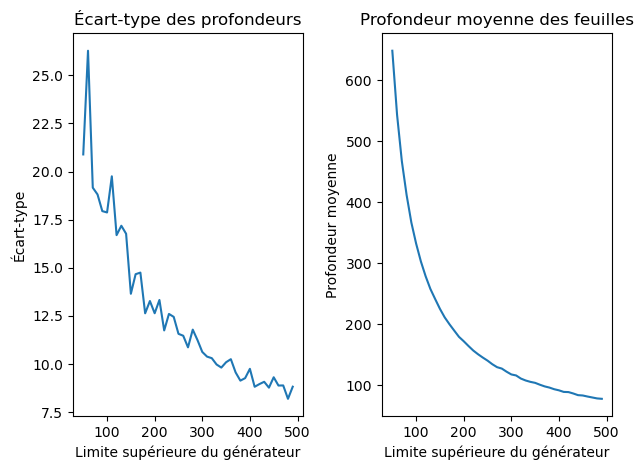

In [ ]:
import numpy as np
import statistics
import tqdm
import random
import matplotlib.pyplot as plt

means, stddevs = [], []

for largest_possible_number in tqdm.tqdm(np.arange(50, 500, 10)):
    t = Tree()
    
    for _ in range(2**15):
        x = random.randint(0, largest_possible_number)
        t.insert(x)

    
    depths_list = get_leaf_depths(t.root)

    stddevs.append(statistics.stdev(depths_list))
    means.append(statistics.mean(depths_list))

# plot de l'écart-type et de la moyenne en fonction du paramètre de loi uniforme lors de la création du BST
plt.subplot(1, 2, 1)
plt.plot(np.arange(50, 500, 10), stddevs)
plt.title("Écart-type des profondeurs")
plt.xlabel("Limite supérieure du générateur")
plt.ylabel("Écart-type")

plt.subplot(1, 2, 2)
plt.plot(np.arange(50, 500, 10), means)
plt.title("Profondeur moyenne des feuilles")
plt.xlabel("Limite supérieure du générateur")
plt.ylabel("Profondeur moyenne")

plt.tight_layout()
plt.show()

Premièrement, l’élément que nous faisons varier est la taille de l’intervalle dans lequel nous tirons les valeurs aléatoires.
Si la taille de cet intervalle est petite, alors il y aura beaucoup de répétitions. Dans notre implémentation, lorsqu’un élément 
déjà présent dans l’arbre est inséré une nouvelle fois, il est systématiquement placé dans le sous-arbre droit. Ainsi, plus il y a
de répétitions, plus l’arbre devient déséquilibré. Dans ce cas, la profondeur moyenne des feuilles augmente fortement et l’écart-type
devient très élevé : l’histogramme est largement étalé, ce qui est le signe d’un arbre fortement dégénéré.

Deuxièmement, lorsque nous augmentons la taille de l’intervalle, les répétitions deviennent rares et, comme nous l’avons vu précédemment, l’arbre tend alors à être approximativement équilibré. La profondeur moyenne diminue et l’écart-type devient faible.
Nous pouvons donc remarquer que plus l’intervalle de tirage est large, moins il y a de doublons, et plus l’arbre est équilibré. 
Les doublons faussent la structure en entraînant un déséquilibre systématique vers le sous-arbre droit, ce qui dégrade fortement 
l’équilibre du BST.
